In [3]:
# Dependencies and Setup
import pandas as pd
import demoji
import matplotlib.pyplot as plt
import numpy as np

# File to Load
chart_path = "spotify_charts.csv"

# Read Chart Data File and store into Pandas DataFrames
chart_data = pd.read_csv(chart_path, encoding='utf-8')

### Question 1 

Which countries were the most influential on the global Spotify market?

In [4]:
#remove global from the regions column
regional_df = chart_data[chart_data["region"] != "Global"]


In [5]:
#count countries
len(regional_df['region'].unique())


68

In [76]:
#create new df based on region
top_countries = regional_df.groupby(['region'])[['total streams','artist']].sum()

#sort df to find top streaming countries
sorted_countries = top_countries.sort_values('total streams', ascending = False)

#variable for top ten countries
top_ten = sorted_countries.head(10)



,total streams
region,
Argentina,1.953381e+10
Australia,2.012821e+10
Austria,2.703191e+09
Belgium,3.883143e+09
Bolivia,1.170959e+09
...,...
United Arab Emirates,3.050062e+08
United Kingdom,3.640880e+10
United States,1.421321e+11


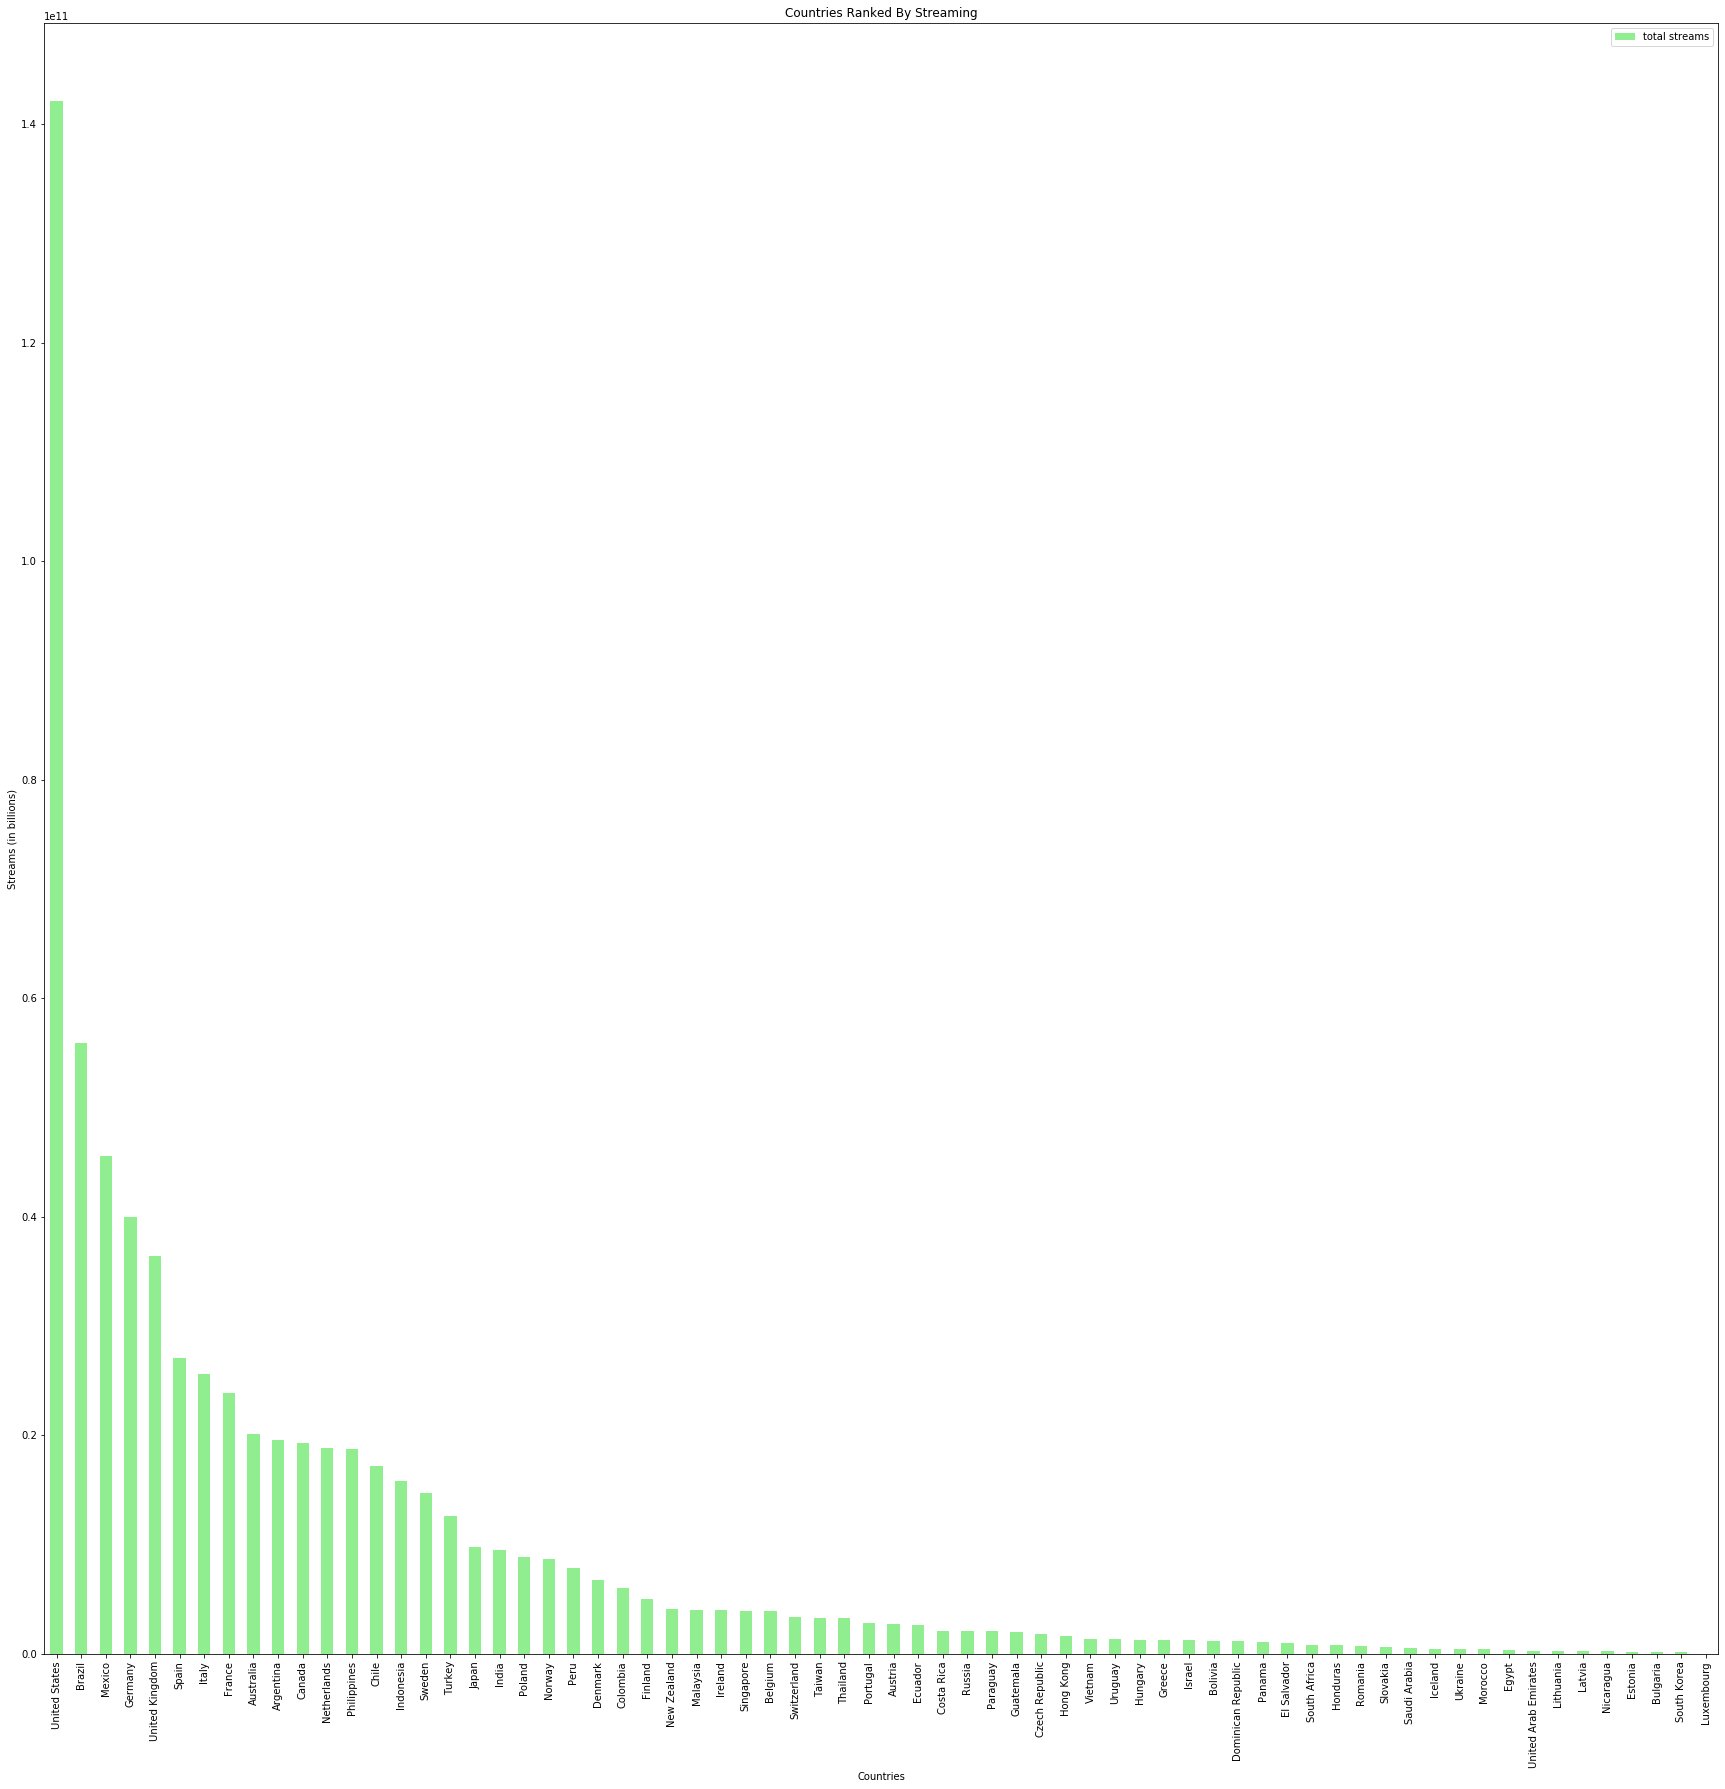

In [64]:
#create bar plot to show all countries streams 
sorted_countries_plot = sorted_countries.plot.bar(y='total streams', figsize =(30,30), width=.5, alpha=1, align="center", color = "lightgreen")

#adds title to bar chart  
plt.title("Countries Ranked By Streaming")

#label xaxis
plt.xlabel("Countries")

#lable yaxis
plt.ylabel("Streams (in billions)")

#rotate xticks to fit lables
plt.xticks(rotation = 90)

#export chart to pngs
plt.savefig("Countries_By_Streaming.png")

#show graph 
plt.show()   

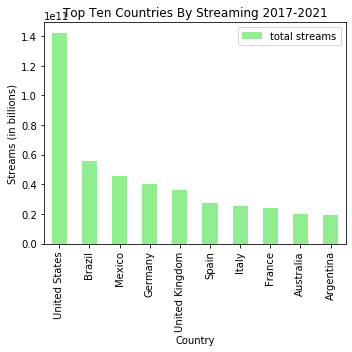

In [110]:
#create bar plot to show top 10 countries streams 
top_countries_plot = top_ten.plot.bar(y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Countries By Streaming 2017-2021")

#label xaxis
plt.xlabel("Country")

#lable yaxis
plt.ylabel("Streams (in billions)")

#top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

#adjust graph layout 
plt.tight_layout()

#export chart to pngs
plt.savefig("Top_Ten_Countries_by_Streaming.png")

#show graph 
plt.show()   

In [96]:
#Find total streams for US
us = chart_data.loc[chart_data["region"] == "United States"]

#sum total streams
us_streaming = us["total streams"].sum()

#Find total streams overall
overall = chart_data.loc[chart_data["region"] == "Global"]

#Sum total streams overall
overall_streaming = overall["total streams"].sum()

#Calcuate percent of streams that are from US
us_percent_streaming = (us_streaming/overall_streaming) * 100

#print streaming percentage
us_percent_streaming

print(f"The U.S. market makes up {us_percent_streaming}% of the total global Spotify streams from 2017-2021.")
      

The U.S. market makes up 32.35390255351552% of the total global Spotify streams from 2017-2021.


### Question 2 

What are the top ranked songs globally  and in the top streaming country?

Top Songs 2017 

In [9]:
#create df for gloabl 2017
df_2017 = chart_data[(chart_data["region"] == "Global") & (chart_data["date"] == 2017)]

#sort df by total streams to find top ten
songs_2017 = df_2017.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_2017 = songs_2017.head(10)

#print top ten 
top_songs_2017


,date,title,artist,region,total streams
48188,2017,Shape of You,Ed Sheeran,Global,1.479857e+09
12958,2017,Despacito - Remix,"Luis Fonsi, Daddy Yankee, Justin Bieber",Global,9.085726e+08
12901,2017,Despacito (Featuring Daddy Yankee),Luis Fonsi,Global,7.391564e+08
50763,2017,Something Just Like This,"The Chainsmokers, Coldplay",Global,6.864717e+08
20887,2017,HUMBLE.,Kendrick Lamar,Global,6.504118e+08
58415,2017,Unforgettable,"French Montana, Swae Lee",Global,6.374831e+08
26931,2017,It Ain't Me (with Selena Gomez),Kygo,Global,6.018790e+08
64176,2017,rockstar,"Post Malone, 21 Savage",Global,5.945494e+08
54451,2017,That's What I Like,Bruno Mars,Global,5.738127e+08
24551,2017,I Don’t Wanna Live Forever (Fifty Shades Darke...,"ZAYN, Taylor Swift",Global,5.667125e+08


In [10]:
#create datframe for US 2017
df_US_2017 = chart_data[(chart_data["region"] == "United States") & (chart_data["date"] == 2017)]

#sort df by total streams 
songs_US_2017 = df_US_2017.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2017 = songs_US_2017.head(10)

#print top ten
top_songs_US_2017

,date,title,artist,region,total streams
20921,2017,HUMBLE.,Kendrick Lamar,United States,334342280.0
11196,2017,Congratulations,"Post Malone, Quavo",United States,280284916.0
48223,2017,Shape of You,Ed Sheeran,United States,278916058.0
33970,2017,Mask Off,Future,United States,239307360.0
12993,2017,Despacito - Remix,"Luis Fonsi, Daddy Yankee, Justin Bieber",United States,232299068.0
64210,2017,rockstar,"Post Malone, 21 Savage",United States,225517132.0
64085,2017,iSpy (feat. Lil Yachty),KYLE,United States,224773101.0
31732,2017,Location,Khalid,United States,222266305.0
268,2017,1-800-273-8255,"Logic, Alessia Cara, Khalid",United States,216950629.0
58449,2017,Unforgettable,"French Montana, Swae Lee",United States,215180711.0


In [111]:
#create variable for top songs 
top_songs_17 = top_songs_US_2017["title"]

#append variable to add global top songs 
new_top_2017 = top_songs_17.append(top_songs_2017["title"])

#create variable for US total streams 
us_songs_2017 = top_songs_US_2017["total streams"]

#create variable for global total streams 
global_songs_2017 = top_songs_2017["total streams"]


In [120]:
#create df for global vs us streams 
global_vs_us_2017 = pd.DataFrame({"Songs": new_top_2017, "US Streams": us_songs_2017, "Global Streams": global_songs_2017})

#reset df index
global_vs_us_2017 = global_vs_us_2017.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2017['Global Streams'] = global_vs_us_2017['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2017['US Streams'] = global_vs_us_2017['US Streams'].fillna(0)

#print df
global_vs_us_2017

,Songs,US Streams,Global Streams
0,1-800-273-8255,216950629.0,0.000000e+00
1,Congratulations,280284916.0,0.000000e+00
2,Despacito (Featuring Daddy Yankee),0.0,7.391564e+08
3,Despacito - Remix,232299068.0,9.085726e+08
4,HUMBLE.,334342280.0,6.504118e+08
5,I Don’t Wanna Live Forever (Fifty Shades Darke...,0.0,5.667125e+08
6,It Ain't Me (with Selena Gomez),0.0,6.018790e+08
7,Location,222266305.0,0.000000e+00
8,Mask Off,239307360.0,0.000000e+00
9,Shape of You,278916058.0,1.479857e+09


In [ ]:
#create x vaiable 
unique_top_songs = global_vs_us_2017["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2017["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2017["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2017")

#plot legend 
plt.legend()

#show plot
plt.show()

In [161]:
#find songs that appear on both top lists
both = global_vs_us_2017.loc[(global_vs_us_2017["US Streams"] > 0) & (global_vs_us_2017["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2017["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2017 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2017}% of the same top ten songs as the global charts in 2017.")

The US charts had 50.0% of the same top ten songs as the global charts in 2017.


Top Songs 2018

In [20]:
#create df for global 2018
df_2018 = chart_data[(chart_data["region"] == "Global") & (chart_data["date"] == 2018)]

#sort df by total streams to find top ten
songs_2018 = df_2018.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_2018 = songs_2018.head(10)

#print top ten 
top_songs_2018

,date,title,artist,region,total streams
91525,2018,God's Plan,Drake,Global,1.126032e+09
122797,2018,SAD!,XXXTENTACION,Global,7.640701e+08
119406,2018,Psycho (feat. Ty Dolla $ign),Post Malone,Global,7.023187e+08
98407,2018,In My Feelings,Drake,Global,7.021119e+08
74624,2018,Better Now,Post Malone,Global,6.860381e+08
96345,2018,I Like It,"Cardi B, Bad Bunny, J Balvin",Global,6.742108e+08
115511,2018,One Kiss (with Dua Lipa),Calvin Harris,Global,6.579202e+08
97670,2018,IDGAF,Dua Lipa,Global,6.172215e+08
106500,2018,Lucid Dreams,Juice WRLD,Global,6.037354e+08
87575,2018,FRIENDS,"Marshmello, Anne-Marie",Global,5.978908e+08


In [21]:
#create datframe for US 2018
df_US_2018 = chart_data[(chart_data["region"] == "United States") & (chart_data["date"] == 2018)]

#sort df by total streams 
songs_US_2018 = df_US_2018.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2018 = songs_US_2018.head(10)

top_songs_US_2018

,date,title,artist,region,total streams
91563,2018,God's Plan,Drake,United States,453226629.0
122834,2018,SAD!,XXXTENTACION,United States,332633597.0
119442,2018,Psycho (feat. Ty Dolla $ign),Post Malone,United States,306877012.0
106537,2018,Lucid Dreams,Juice WRLD,United States,299907223.0
105578,2018,Look Alive (feat. Drake),BlocBoy JB,United States,266861797.0
112843,2018,Nice For What,Drake,United States,263455062.0
74661,2018,Better Now,Post Malone,United States,254098207.0
98444,2018,In My Feelings,Drake,United States,245715031.0
110459,2018,Moonlight,XXXTENTACION,United States,245410462.0
96383,2018,I Like It,"Cardi B, Bad Bunny, J Balvin",United States,240430007.0


In [25]:
#create variable for top songs 
top_songs_18 = top_songs_US_2018["title"]

#append variable to add global top songs 
new_top_2018 = top_songs_18.append(top_songs_2018["title"])

#create variable for US total streams 
us_songs_2018 = top_songs_US_2018[str("total streams")]

#create variable for global total streams 
global_songs_2018 = top_songs_2018[str("total streams")]

new_top_2018.dtype


dtype('O')

In [162]:
#create df for global vs us streams 
global_vs_us_2018 = pd.DataFrame({"Songs": new_top_2018, "US Streams": us_songs_2018, "Global Streams": global_songs_2018})

#reset df index
global_vs_us_2018 = global_vs_us_2018.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2018['Global Streams'] = global_vs_us_2018['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2018['US Streams'] = global_vs_us_2018['US Streams'].fillna(0)

#print df
global_vs_us_2018


,Songs,US Streams,Global Streams
0,Better Now,254098207.0,6.860381e+08
1,FRIENDS,0.0,5.978908e+08
2,God's Plan,453226629.0,1.126032e+09
3,I Like It,240430007.0,6.742108e+08
4,IDGAF,0.0,6.172215e+08
5,In My Feelings,245715031.0,7.021119e+08
6,Look Alive (feat. Drake),266861797.0,0.000000e+00
7,Lucid Dreams,299907223.0,6.037354e+08
8,Moonlight,245410462.0,0.000000e+00
9,Nice For What,263455062.0,0.000000e+00


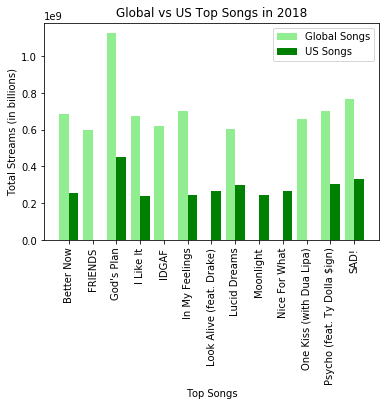

In [95]:
#create x vaiable 
unique_top_songs = global_vs_us_2018["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2018["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2018["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2018")

#plot legend 
plt.legend()

#show plot
plt.show()

In [164]:
#find songs that appear on both top lists
both = global_vs_us_2018.loc[(global_vs_us_2018["US Streams"] > 0) & (global_vs_us_2018["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2018["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2018 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2018}% of the same top ten songs as the global charts in 2018.")

The US charts had 70.0% of the same top ten songs as the global charts in 2018.


Top Songs 2019

In [28]:
#create df for global 2019
df_2019 = chart_data[(chart_data["region"] == "Global") & (chart_data["date"] == 2019)]

#sort df by total streams to find top ten
songs_2019 = df_2019.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_2019 = songs_2019.head(10)

#print top ten 
top_songs_2019

,date,title,artist,region,total streams
206911,2019,Señorita,"Shawn Mendes, Camila Cabello",Global,1.070268e+09
222870,2019,bad guy,Billie Eilish,Global,1.052359e+09
211012,2019,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",Global,9.869068e+08
150418,2019,7 rings,Ariana Grande,Global,9.613615e+08
209271,2019,Someone You Loved,Lewis Capaldi,Global,8.237803e+08
177812,2019,I Don't Care (with Justin Bieber),Ed Sheeran,Global,8.183464e+08
163502,2019,Dance Monkey,Tones And I,Global,7.642083e+08
221201,2019,Wow.,Post Malone,Global,7.515304e+08
161803,2019,Con Calma,"Daddy Yankee, Snow",Global,7.150279e+08
207040,2019,Shallow,"Lady Gaga, Bradley Cooper",Global,7.140972e+08


In [29]:
#create datframe for US 2019
df_US_2019 = chart_data[(chart_data["region"] == "United States") & (chart_data["date"] == 2019)]

#sort df by total streams 
songs_US_2019 = df_US_2019.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2019 = songs_US_2019.head(10)

top_songs_US_2019

,date,title,artist,region,total streams
211054,2019,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",United States,389059531.0
221240,2019,Wow.,Post Malone,United States,297846574.0
150460,2019,7 rings,Ariana Grande,United States,280698165.0
188644,2019,MIDDLE CHILD,J. Cole,United States,277704991.0
222912,2019,bad guy,Billie Eilish,United States,266782562.0
173001,2019,Going Bad (feat. Drake),Meek Mill,United States,242889031.0
216312,2019,Truth Hurts,Lizzo,United States,239980228.0
202689,2019,Ransom,Lil Tecca,United States,214034982.0
166353,2019,Drip Too Hard (Lil Baby & Gunna),Lil Baby,United States,208752215.0
211530,2019,Swervin (feat. 6ix9ine),A Boogie Wit da Hoodie,United States,205758012.0


In [30]:
#create variable for top songs 
top_songs_19 = top_songs_US_2019["title"]

#append variable to add global top songs 
new_top_2019 = top_songs_19.append(top_songs_2019["title"])

#create variable for US total streams 
us_songs_2019 = top_songs_US_2019["total streams"]

#create variable for global total streams 
global_songs_2019 = top_songs_2019["total streams"]


In [31]:
#create df for global vs us streams 
global_vs_us_2019 = pd.DataFrame({"Songs": new_top_2019, "US Streams": us_songs_2019, "Global Streams": global_songs_2019})

#reset df index
global_vs_us_2019 = global_vs_us_2019.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2019['Global Streams'] = global_vs_us_2019['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2019['US Streams'] = global_vs_us_2019['US Streams'].fillna(0)

#print df
global_vs_us_2019

,Songs,US Streams,Global Streams
0,7 rings,280698165.0,9.613615e+08
1,Con Calma,0.0,7.150279e+08
2,Dance Monkey,0.0,7.642083e+08
3,Drip Too Hard (Lil Baby & Gunna),208752215.0,0.000000e+00
4,Going Bad (feat. Drake),242889031.0,0.000000e+00
5,I Don't Care (with Justin Bieber),0.0,8.183464e+08
6,MIDDLE CHILD,277704991.0,0.000000e+00
7,Ransom,214034982.0,0.000000e+00
8,Señorita,0.0,1.070268e+09
9,Shallow,0.0,7.140972e+08


In [ ]:
#create x variable 
unique_top_songs = global_vs_us_2019["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2019["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2019["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2019")

#plot legend 
plt.legend()

#show plot
plt.show()

In [165]:
#find songs that appear on both top lists
both = global_vs_us_2019.loc[(global_vs_us_2019["US Streams"] > 0) & (global_vs_us_2019["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2019["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2019 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2019}% of the same top ten songs as the global charts in 2019.")

The US charts had 40.0% of the same top ten songs as the global charts in 2019.


#Top Songs 2020

In [33]:
#create df for global 2020
df_2020 = chart_data[(chart_data["region"] == "Global") & (chart_data["date"] == 2020)]

#sort df by total streams to find top ten
songs_2020 = df_2020.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_2020 = songs_2020.head(10)

#print top ten 
top_songs_2020

,date,title,artist,region,total streams
237896,2020,Blinding Lights,The Weeknd,Global,1.645923e+09
244984,2020,Dance Monkey,Tones And I,Global,1.196398e+09
289202,2020,Roses - Imanbek Remix,SAINt JHN,Global,1.040359e+09
300515,2020,The Box,Roddy Ricch,Global,1.036463e+09
247554,2020,Don't Start Now,Dua Lipa,Global,1.025911e+09
286944,2020,ROCKSTAR (feat. Roddy Ricch),DaBaby,Global,9.100117e+08
307046,2020,Watermelon Sugar,Harry Styles,Global,8.535687e+08
295471,2020,Someone You Loved,Lewis Capaldi,Global,7.873064e+08
311637,2020,death bed (coffee for your head),"Powfu, beabadoobee",Global,7.790153e+08
303712,2020,Tusa,"KAROL G, Nicki Minaj",Global,7.652238e+08


In [34]:
#create datframe for US 2020
df_US_2020 = chart_data[(chart_data["region"] == "United States") & (chart_data["date"] == 2020)]

#sort df by total streams 
songs_US_2020 = df_US_2020.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2020 = songs_US_2020.head(10)

top_songs_US_2020

,date,title,artist,region,total streams
300559,2020,The Box,Roddy Ricch,United States,400892436.0
237940,2020,Blinding Lights,The Weeknd,United States,331037132.0
238354,2020,Blueberry Faygo,Lil Mosey,United States,272855565.0
286988,2020,ROCKSTAR (feat. Roddy Ricch),DaBaby,United States,268822544.0
269526,2020,Life Is Good (feat. Drake),Future,United States,240623838.0
242340,2020,Circles,Post Malone,United States,219423327.0
287132,2020,ROXANNE,Arizona Zervas,United States,202582156.0
306327,2020,WAP (feat. Megan Thee Stallion),Cardi B,United States,200800495.0
307090,2020,Watermelon Sugar,Harry Styles,United States,200626866.0
306431,2020,WHATS POPPIN,Jack Harlow,United States,189004912.0


In [35]:
#create variable for top songs 
top_songs_20 = top_songs_US_2020["title"]

#append variable to add global top songs 
new_top_2020 = top_songs_20.append(top_songs_2020["title"])

#create variable for US total streams 
us_songs_2020 = top_songs_US_2020["total streams"]

#create variable for global total streams 
global_songs_2020 = top_songs_2020["total streams"]

In [36]:
#create df for global vs us streams 
global_vs_us_2020 = pd.DataFrame({"Songs": new_top_2020, "US Streams": us_songs_2020, "Global Streams": global_songs_2020})

#reset df index
global_vs_us_2020 = global_vs_us_2020.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2020['Global Streams'] = global_vs_us_2020['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2020['US Streams'] = global_vs_us_2020['US Streams'].fillna(0)

#print df
global_vs_us_2020

,Songs,US Streams,Global Streams
0,Blinding Lights,331037132.0,1.645923e+09
1,Blueberry Faygo,272855565.0,0.000000e+00
2,Circles,219423327.0,0.000000e+00
3,Dance Monkey,0.0,1.196398e+09
4,Don't Start Now,0.0,1.025911e+09
5,Life Is Good (feat. Drake),240623838.0,0.000000e+00
6,ROCKSTAR (feat. Roddy Ricch),268822544.0,9.100117e+08
7,ROXANNE,202582156.0,0.000000e+00
8,Roses - Imanbek Remix,0.0,1.040359e+09
9,Someone You Loved,0.0,7.873064e+08


In [ ]:
#create x variable 
unique_top_songs = global_vs_us_2020["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2020["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2020["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2020")

#plot legend 
plt.legend()

#show plot
plt.show()

In [166]:
#find songs that appear on both top lists
both = global_vs_us_2020.loc[(global_vs_us_2020["US Streams"] > 0) & (global_vs_us_2020["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2020["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2020 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2020}% of the same top ten songs as the global charts in 2020.")

The US charts had 40.0% of the same top ten songs as the global charts in 2020.


Top Songs 2021

In [38]:
#create df for global 2021
df_2021 = chart_data[(chart_data["region"] == "Global") & (chart_data["date"] == 2021)]

#sort df by total streams to find top ten
songs_2021 = df_2021.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_2021 = songs_2021.head(10)

#print top ten 
top_songs_2021

,date,title,artist,region,total streams
396913,2021,drivers license,Olivia Rodrigo,Global,1.166101e+09
377424,2021,STAY (with Justin Bieber),The Kid LAROI,Global,1.165565e+09
360698,2021,MONTERO (Call Me By Your Name),Lil Nas X,Global,1.129255e+09
397403,2021,good 4 u,Olivia Rodrigo,Global,1.099668e+09
357373,2021,Levitating (feat. DaBaby),Dua Lipa,Global,9.595836e+08
371353,2021,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,Global,9.362481e+08
354077,2021,Kiss Me More (feat. SZA),Doja Cat,Global,9.060967e+08
328392,2021,Blinding Lights,The Weeknd,Global,8.733742e+08
347305,2021,Heat Waves,Glass Animals,Global,8.689604e+08
350399,2021,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,Global,8.235570e+08


In [43]:
#create datframe for US 2021
df_US_2021 = chart_data[(chart_data["region"] == "United States") & (chart_data["date"] == 2021)]

#sort df by total streams 
songs_US_2021 = df_US_2021.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2021 = songs_US_2021.head(10)

top_songs_US_2021

,date,title,artist,region,total streams
397448,2021,good 4 u,Olivia Rodrigo,United States,316909493.0
396958,2021,drivers license,Olivia Rodrigo,United States,306465075.0
347346,2021,Heat Waves,Glass Animals,United States,274698424.0
354122,2021,Kiss Me More (feat. SZA),Doja Cat,United States,268963860.0
357418,2021,Levitating (feat. DaBaby),Dua Lipa,United States,259084916.0
360743,2021,MONTERO (Call Me By Your Name),Lil Nas X,United States,249089858.0
377469,2021,STAY (with Justin Bieber),The Kid LAROI,United States,241632288.0
373994,2021,RAPSTAR,Polo G,United States,222366492.0
350444,2021,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,United States,217493707.0
396854,2021,deja vu,Olivia Rodrigo,United States,213855457.0


In [44]:
#create variable for top songs 
top_songs_21 = top_songs_US_2021["title"]

#append variable to add global top songs 
new_top_2021 = top_songs_21.append(top_songs_2021["title"])

#create variable for US total streams 
us_songs_2021 = top_songs_US_2021["total streams"]

#create variable for global total streams 
global_songs_2021 = top_songs_2021["total streams"]

In [45]:
#create df for global vs us streams 
global_vs_us_2021 = pd.DataFrame({"Songs": new_top_2021, "US Streams": us_songs_2021, "Global Streams": global_songs_2021})

#reset df index
global_vs_us_2021 = global_vs_us_2021.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2021['Global Streams'] = global_vs_us_2021['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2021['US Streams'] = global_vs_us_2021['US Streams'].fillna(0)

#print df
global_vs_us_2021

,Songs,US Streams,Global Streams
0,Blinding Lights,0.0,8.733742e+08
1,Heat Waves,274698424.0,8.689604e+08
2,INDUSTRY BABY (feat. Jack Harlow),217493707.0,8.235570e+08
3,Kiss Me More (feat. SZA),268963860.0,9.060967e+08
4,Levitating (feat. DaBaby),259084916.0,9.595836e+08
5,MONTERO (Call Me By Your Name),249089858.0,1.129255e+09
6,Peaches (feat. Daniel Caesar & Giveon),0.0,9.362481e+08
7,RAPSTAR,222366492.0,0.000000e+00
8,STAY (with Justin Bieber),241632288.0,1.165565e+09
9,deja vu,213855457.0,0.000000e+00


In [ ]:
#create x variable 
unique_top_songs = global_vs_us_2021["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2021["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2021["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2021")

#plot legend 
plt.legend()

#show plot
plt.show()

In [167]:
#find songs that appear on both top lists
both = global_vs_us_2021.loc[(global_vs_us_2021["US Streams"] > 0) & (global_vs_us_2021["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2021["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2021 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2021}% of the same top ten songs as the global charts in 2021.")

The US charts had 80.0% of the same top ten songs as the global charts in 2021.


Top Songs Overall 2017-2021 

In [47]:
#create df for global overall
df_overall = chart_data[chart_data["region"] == "Global"]

#sort df by total streams to find top ten
songs_overall = df_overall.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_overall = songs_overall.head(10)

#print top ten 
top_songs_overall

,date,title,artist,region,total streams
237896,2020,Blinding Lights,The Weeknd,Global,1.645923e+09
48188,2017,Shape of You,Ed Sheeran,Global,1.479857e+09
244984,2020,Dance Monkey,Tones And I,Global,1.196398e+09
396913,2021,drivers license,Olivia Rodrigo,Global,1.166101e+09
377424,2021,STAY (with Justin Bieber),The Kid LAROI,Global,1.165565e+09
360698,2021,MONTERO (Call Me By Your Name),Lil Nas X,Global,1.129255e+09
91525,2018,God's Plan,Drake,Global,1.126032e+09
397403,2021,good 4 u,Olivia Rodrigo,Global,1.099668e+09
206911,2019,Señorita,"Shawn Mendes, Camila Cabello",Global,1.070268e+09
222870,2019,bad guy,Billie Eilish,Global,1.052359e+09


In [48]:
#create datframe for US overall
df_US_overall = chart_data[chart_data["region"] == "United States"]

#sort df by total streams 
songs_US_overall = df_US_overall.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_overall = songs_US_overall.head(10)

top_songs_US_overall

,date,title,artist,region,total streams
91563,2018,God's Plan,Drake,United States,453226629.0
300559,2020,The Box,Roddy Ricch,United States,400892436.0
211054,2019,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",United States,389059531.0
20921,2017,HUMBLE.,Kendrick Lamar,United States,334342280.0
122834,2018,SAD!,XXXTENTACION,United States,332633597.0
237940,2020,Blinding Lights,The Weeknd,United States,331037132.0
397448,2021,good 4 u,Olivia Rodrigo,United States,316909493.0
119442,2018,Psycho (feat. Ty Dolla $ign),Post Malone,United States,306877012.0
396958,2021,drivers license,Olivia Rodrigo,United States,306465075.0
106537,2018,Lucid Dreams,Juice WRLD,United States,299907223.0


In [49]:
#create variable for top songs 
top_songs_all = top_songs_US_overall["title"]

#append variable to add global top songs 
new_top_overall = top_songs_all.append(top_songs_overall["title"])

#create variable for US total streams 
us_songs_overall = top_songs_US_overall["total streams"]

#create variable for global total streams 
global_songs_overall = top_songs_overall["total streams"]

In [50]:
#create df for global vs us streams 
global_vs_us_overall = pd.DataFrame({"Songs": new_top_overall, "US Streams": us_songs_overall, "Global Streams": global_songs_overall})

#reset df index
global_vs_us_overall = global_vs_us_overall.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_overall['Global Streams'] = global_vs_us_overall['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_overall['US Streams'] = global_vs_us_overall['US Streams'].fillna(0)

#print df
global_vs_us_overall

,Songs,US Streams,Global Streams
0,Blinding Lights,331037132.0,1.645923e+09
1,Dance Monkey,0.0,1.196398e+09
2,God's Plan,453226629.0,1.126032e+09
3,HUMBLE.,334342280.0,0.000000e+00
4,Lucid Dreams,299907223.0,0.000000e+00
5,MONTERO (Call Me By Your Name),0.0,1.129255e+09
6,Psycho (feat. Ty Dolla $ign),306877012.0,0.000000e+00
7,SAD!,332633597.0,0.000000e+00
8,STAY (with Justin Bieber),0.0,1.165565e+09
9,Señorita,0.0,1.070268e+09


In [ ]:
#create x variable 
unique_top_songs = global_vs_us_overall["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_overall["Global Streams"]

#define y variable #2
us_songs = global_vs_us_overall["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs 2017-2021")

#plot legend 
plt.legend()

#show plot
plt.show()

In [168]:
#find songs that appear on both top lists
both = global_vs_us_overall.loc[(global_vs_us_overall["US Streams"] > 0) & (global_vs_us_overall["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_overall["title"].count()

#find percent of US songs that appear in global top ten
song_percent_overall = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_overall}% of the same top ten songs as the global charts 2017-2021.")

The US charts had 40.0% of the same top ten songs as the global charts 2017-2021.


In [52]:
BL_df = chart_data[(chart_data["region"] != "Global") & (chart_data["title"] == "Blinding Lights")]

In [53]:
BL_sorted = BL_df.sort_values("total streams", ascending = False)
BL_sorted

,date,title,artist,region,total streams
237940,2020,Blinding Lights,The Weeknd,United States,331037132.0
328437,2021,Blinding Lights,The Weeknd,United States,177035940.0
237913,2020,Blinding Lights,The Weeknd,Mexico,144665106.0
237895,2020,Blinding Lights,The Weeknd,Germany,122234476.0
237939,2020,Blinding Lights,The Weeknd,United Kingdom,113847572.0
...,...,...,...,...,...
237911,2020,Blinding Lights,The Weeknd,Luxembourg,61660.0
157337,2019,Blinding Lights,The Weeknd,Peru,43652.0
328407,2021,Blinding Lights,The Weeknd,Luxembourg,32115.0
157328,2019,Blinding Lights,The Weeknd,Luxembourg,13435.0


### Question 3

Which artists were the most influential globally (broken down by year)?

In [54]:
#group 2017 dataframe by artist
artist_2017 = df_2017.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2017 = artist_2017["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2017

artist
Ed Sheeran                                 4.526988e+09
Kendrick Lamar                             1.780347e+09
Drake                                      1.361656e+09
Imagine Dragons                            1.149847e+09
Clean Bandit                               1.043145e+09
Bruno Mars                                 9.554295e+08
Shawn Mendes                               9.295550e+08
DJ Khaled                                  9.241034e+08
Charlie Puth                               9.112363e+08
Luis Fonsi, Daddy Yankee, Justin Bieber    9.085726e+08
Name: total streams, dtype: float64

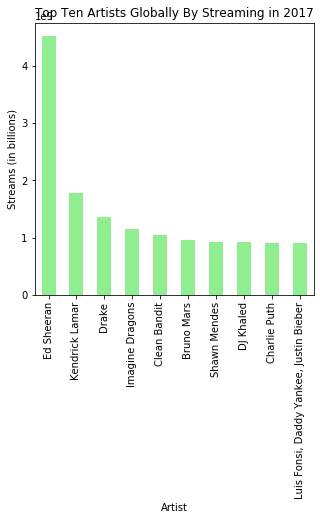

In [55]:
#plot top ten artists 2017
artists_2017_plot = top_artist_2017.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2017")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show()  

In [56]:
#group 2018 dataframe by artist
artist_2018 = df_2018.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2018 = artist_2018["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2018

artist
Drake              3.699736e+09
Post Malone        3.593382e+09
XXXTENTACION       3.476900e+09
Ed Sheeran         1.843402e+09
Ariana Grande      1.712529e+09
Travis Scott       1.400225e+09
Khalid             1.262409e+09
Imagine Dragons    1.255528e+09
Dua Lipa           1.122339e+09
Eminem             1.103239e+09
Name: total streams, dtype: float64

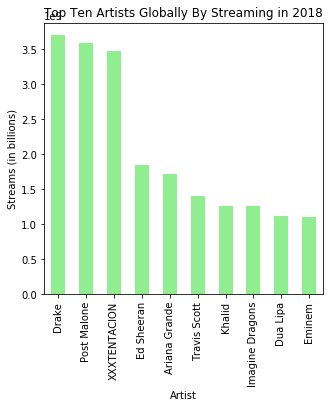

In [57]:
#plot top ten artists 2018 
artists_2018_plot = top_artist_2018.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2018")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show()  

In [58]:
#group 2019 dataframe by artist
artist_2019 = df_2019.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2019 = artist_2019["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2019

artist
Billie Eilish    4.307618e+09
Post Malone      3.832518e+09
Ariana Grande    3.359018e+09
Ed Sheeran       3.118913e+09
Lil Nas X        1.376412e+09
Khalid           1.312113e+09
Sam Smith        1.263225e+09
XXXTENTACION     1.233752e+09
Taylor Swift     1.179359e+09
Queen            1.165437e+09
Name: total streams, dtype: float64

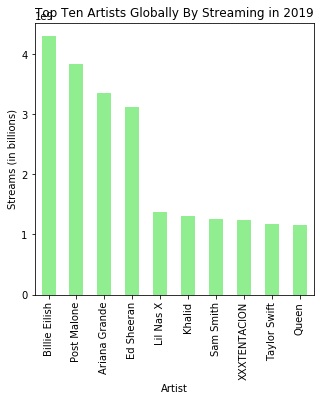

In [59]:
#plot top ten artists 2021 
artists_2019_plot = top_artist_2019.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2019")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show()  

In [60]:
#group 2020 dataframe by artist
artist_2020 = df_2020.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2020 = artist_2020["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2020 
top_artist_2020

artist
Juice WRLD       2.646395e+09
The Weeknd       2.584035e+09
Billie Eilish    2.567697e+09
Dua Lipa         2.154795e+09
Harry Styles     1.976688e+09
Pop Smoke        1.819048e+09
Ariana Grande    1.812316e+09
Justin Bieber    1.777000e+09
Lewis Capaldi    1.621972e+09
Bad Bunny        1.613431e+09
Name: total streams, dtype: float64

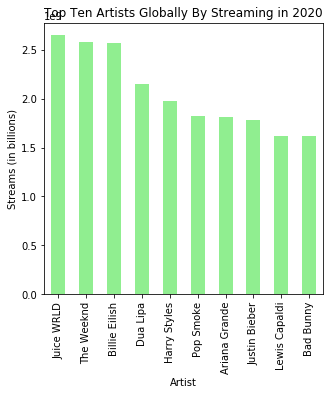

In [61]:
#plot top ten artists 2021 
artists_2020_plot = top_artist_2020.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2020")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show()   

In [62]:
#group 2021 dataframe by artist
artist_2021 = df_2021.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2021 = artist_2021["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2021

artist
Olivia Rodrigo    4.995366e+09
Doja Cat          2.738570e+09
The Weeknd        2.637264e+09
Lil Nas X         2.492472e+09
Justin Bieber     2.387214e+09
Ed Sheeran        2.174115e+09
Dua Lipa          2.158522e+09
Billie Eilish     2.109372e+09
Drake             1.859539e+09
The Kid LAROI     1.788797e+09
Name: total streams, dtype: float64

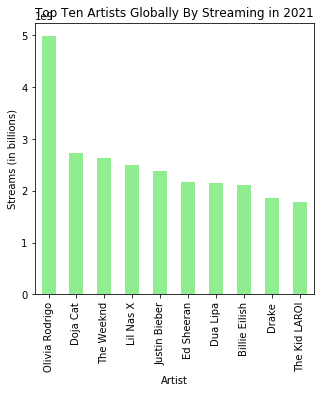

In [63]:
#plot top ten artists 2021 
artists_2021_plot = top_artist_2021.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2021")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show()   